In [120]:
!pwd

/Users/ausubo/ds/metis/temporary/mta-turnstile/mta-turnstile-master


In [3]:
import csv
import collections
from dateutil.parser import parser
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import pandas as pd
import seaborn

In [4]:
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [5]:
turnstile_df.columns = turnstile_df.columns.str.strip()
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)


In [6]:
#THIS STEP TAKES FOREVER!!!!!
m =turnstile_df['DATE']

turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek


In [7]:
turnstile_df['STATIONLINE'] = turnstile_df['STATION'] + turnstile_df['LINENAME']

In [8]:
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,<dateutil.parser.parser object at 0x113f62750>,5,59 STNQR456
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,<dateutil.parser.parser object at 0x103e88e10>,5,59 STNQR456
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,<dateutil.parser.parser object at 0x103e88650>,5,59 STNQR456
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,<dateutil.parser.parser object at 0x103e88e90>,5,59 STNQR456
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,<dateutil.parser.parser object at 0x103e88d50>,5,59 STNQR456
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,<dateutil.parser.parser object at 0x103e88ed0>,5,59 STNQR456
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,<dateutil.parser.parser object at 0x103e88d10>,6,59 STNQR456
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,<dateutil.parser.parser object at 0x103e88f10>,6,59 STNQR456
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,<dateutil.parser.parser object at 0x103e88f50>,6,59 STNQR456
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,<dateutil.parser.parser object at 0x113f6f5d0>,6,59 STNQR456


In [9]:
test =turnstile_df.groupby(['STATIONLINE', 'C/A', 'UNIT', 'SCP'])

In [10]:
turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff)

In [11]:
foo = turnstile_df['net_in']
print len(foo[foo>5000])
print len(foo[foo<-5000])

96
105


In [12]:
turnstile_df[turnstile_df['net_in']>5000] = numpy.nan
turnstile_df[turnstile_df['net_in']<-5000] = numpy.nan
turnstile_df['net_in']=numpy.abs(turnstile_df['net_in'])
turnstile_df[turnstile_df['net_out']>5000] = numpy.nan
turnstile_df[turnstile_df['net_out']<-5000] = numpy.nan
turnstile_df['net_out']=numpy.abs(turnstile_df['net_out'])
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x113f62750>,5.0,59 STNQR456,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x103e88e10>,5.0,59 STNQR456,50.0,10.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x103e88650>,5.0,59 STNQR456,23.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x103e88e90>,5.0,59 STNQR456,144.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x103e88d50>,5.0,59 STNQR456,296.0,63.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x103e88ed0>,5.0,59 STNQR456,348.0,57.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x103e88d10>,6.0,59 STNQR456,172.0,74.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x103e88f10>,6.0,59 STNQR456,22.0,5.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x103e88f50>,6.0,59 STNQR456,25.0,25.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x113f6f5d0>,6.0,59 STNQR456,92.0,69.0


In [13]:
turnstile_df['net_sum']= turnstile_df['net_in']+ turnstile_df['net_out']

In [14]:
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,STATIONLINE,net_in,net_out,net_sum
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x113f62750>,5.0,59 STNQR456,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x103e88e10>,5.0,59 STNQR456,50.0,10.0,60.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x103e88650>,5.0,59 STNQR456,23.0,31.0,54.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x103e88e90>,5.0,59 STNQR456,144.0,110.0,254.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x103e88d50>,5.0,59 STNQR456,296.0,63.0,359.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x103e88ed0>,5.0,59 STNQR456,348.0,57.0,405.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x103e88d10>,6.0,59 STNQR456,172.0,74.0,246.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x103e88f10>,6.0,59 STNQR456,22.0,5.0,27.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x103e88f50>,6.0,59 STNQR456,25.0,25.0,50.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x113f6f5d0>,6.0,59 STNQR456,92.0,69.0,161.0


In [15]:
daily_entry = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATIONLINE', 'dayofweek'])['net_sum'].sum()

In [16]:
daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [88]:
total_entry = turnstile_df.groupby(['STATIONLINE'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATIONLINE'])['net_out'].sum()

In [89]:
total = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total], axis=1)

In [90]:
summary.columns = ['total_entry', 'total_exit', 'total_traffic']

In [91]:
summary = summary.reset_index()

In [92]:
summary_total = summary.sort_values(by = 'total_traffic', ascending = False)

In [93]:
summary_total.head(10)

,STATIONLINE,total_entry,total_exit,total_traffic
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0
25,14 ST-UNION SQLNQR456,1873490.0,1597535.0,3471025.0
156,86 ST456,1667180.0,1532008.0,3199188.0
107,47-50 STS ROCKBDFM,1419826.0,1474352.0,2894178.0
286,FLUSHING-MAIN7,1556444.0,1241369.0,2797813.0
123,59 ST COLUMBUSABCD1,1528813.0,1184572.0,2713385.0


In [26]:
summary_total.sum()

STATIONLINE      GRD CNTRL-42 ST4567S34 ST-HERALD SQBDFMNQRTIME...
total_entry                                            1.48235e+08
total_exit                                             1.11185e+08
total_traffic                                           2.5942e+08
dtype: object

In [30]:
total_entries = summary_total.sum()[1]
total_exits = summary_total.sum()[2]
total_overall_traffic = summary_total.sum()[3]

In [31]:
print total_entries, total_exits, total_overall_traffic

148235327.0 111184660.0 259419987.0


In [32]:
summary_total['total_normalized'] = summary_total['total_traffic']/total_overall_traffic

In [34]:
summary_total['entries_normalized'] = summary_total['total_entry']/total_entries

In [35]:
summary_total['exits_normalized'] = summary_total['total_exit']/total_exits

In [94]:
summary_total.columns

Index([u'STATIONLINE', u'total_entry', u'total_exit', u'total_traffic'], dtype='object')

In [95]:
summary_total['p_total'] = summary_total['total_traffic']/total_overall_traffic

In [99]:
summary_total['p_entry'] = summary_total['total_entry']/total_entries

In [100]:
summary_total['p_exit'] = summary_total['total_exit']/total_exits

In [101]:
summary_total.head()

,STATIONLINE,total_entry,total_exit,total_traffic,p_total,p_entry,p_exit
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0,0.026216,0.024332,0.028729
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0,0.022355,0.020776,0.024460
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0,0.015535,0.014850,0.016447
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014666,0.015391,0.013698
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0,0.014650,0.013508,0.016172


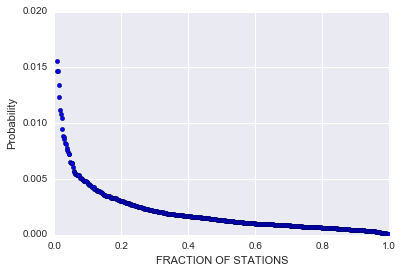

In [119]:
frame = plt.gca()

plt.scatter(to_470, summary_total['p_total'])
plt.ylabel('Probability')
plt.xlabel('FRACTION OF STATIONS')
plt.title('')
plt.ylim((0,0.02))
plt.xlim((0, 1))

plt.savefig('prob_dist_TEST.png', dpi = 300, bbox_inches = 'tight')


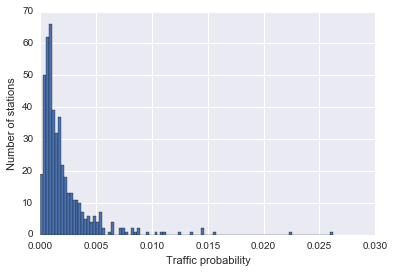

In [118]:
frame = plt.gca()

plt.hist(summary_total['p_total'], bins = 100)
plt.ylabel('Number of stations')
plt.xlabel('Traffic probability')

plt.savefig('histogram_TEST.png', dpi = 300, bbox_inches = 'tight')


In [36]:
summary_total.head()

,STATIONLINE,total_entry,total_exit,total_traffic,total_normalized,entries_normalized,exits_normalized
309,GRD CNTRL-42 ST4567S,3606847.0,3194237.0,6801084.0,0.026216,0.024332,0.028729
90,34 ST-HERALD SQBDFMNQR,3079692.0,2719583.0,5799275.0,0.022355,0.020776,0.024460
442,TIMES SQ-42 ST1237ACENQRS,2201328.0,1828694.0,4030022.0,0.015535,0.014850,0.016447
103,42 ST-PORT AUTHACENQRS1237,2281541.0,1523053.0,3804594.0,0.014666,0.015391,0.013698
94,34 ST-PENN STAACE,2002397.0,1798088.0,3800485.0,0.014650,0.013508,0.016172


In [37]:
by_stationline_norm = summary_total[['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']]

In [38]:
cumulative = by_stationline_norm.cumsum(axis=None, dtype=None, out=None, skipna=True)

In [40]:
cumulative['STATIONLINE'] = by_stationline_norm['STATIONLINE']

In [42]:
cumulative.head(10)

,STATIONLINE,total_normalized,entries_normalized,exits_normalized
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [43]:
names = cumulative.columns.tolist()
names

['STATIONLINE', 'total_normalized', 'entries_normalized', 'exits_normalized']

In [44]:
names[names.index('total_normalized')] = 'total_cumulative'
names[names.index('entries_normalized')] = 'entries_cumulative'
names[names.index('exits_normalized')] = 'exits_cumulative'

cumulative.columns = names

In [45]:
cumulative.head(30)

,STATIONLINE,total_cumulative,entries_cumulative,exits_cumulative
309,GRD CNTRL-42 ST4567S,0.0262165,0.0243319,0.0287291
90,34 ST-HERALD SQBDFMNQR,0.0485713,0.0451076,0.0531892
442,TIMES SQ-42 ST1237ACENQRS,0.064106,0.0599578,0.0696365
103,42 ST-PORT AUTHACENQRS1237,0.0787718,0.0753492,0.0833349
94,34 ST-PENN STAACE,0.0934217,0.0888574,0.099507
25,14 ST-UNION SQLNQR456,0.106802,0.101496,0.113875
156,86 ST456,0.119134,0.112743,0.127654
107,47-50 STS ROCKBDFM,0.13029,0.122321,0.140915
286,FLUSHING-MAIN7,0.141075,0.132821,0.15208
123,59 ST COLUMBUSABCD1,0.151534,0.143134,0.162734


In [46]:
len(cumulative['STATIONLINE'])

470

In [58]:
from __future__ import division
to_470 = numpy.arange(1, len(cumulative['STATIONLINE']) + 1)/len(cumulative['STATIONLINE'])

In [59]:
to_470

array([ 0.00212766,  0.00425532,  0.00638298,  0.00851064,  0.0106383 ,
        0.01276596,  0.01489362,  0.01702128,  0.01914894,  0.0212766 ,
        0.02340426,  0.02553191,  0.02765957,  0.02978723,  0.03191489,
        0.03404255,  0.03617021,  0.03829787,  0.04042553,  0.04255319,
        0.04468085,  0.04680851,  0.04893617,  0.05106383,  0.05319149,
        0.05531915,  0.05744681,  0.05957447,  0.06170213,  0.06382979,
        0.06595745,  0.06808511,  0.07021277,  0.07234043,  0.07446809,
        0.07659574,  0.0787234 ,  0.08085106,  0.08297872,  0.08510638,
        0.08723404,  0.0893617 ,  0.09148936,  0.09361702,  0.09574468,
        0.09787234,  0.1       ,  0.10212766,  0.10425532,  0.10638298,
        0.10851064,  0.1106383 ,  0.11276596,  0.11489362,  0.11702128,
        0.11914894,  0.1212766 ,  0.12340426,  0.12553191,  0.12765957,
        0.12978723,  0.13191489,  0.13404255,  0.13617021,  0.13829787,
        0.14042553,  0.14255319,  0.14468085,  0.14680851,  0.14

In [60]:
cumulative.tail()

,STATIONLINE,total_cumulative,entries_cumulative,exits_cumulative
201,BEACH 98 STAS,0.999824,0.999759,0.999912
444,TOMPKINSVILLE1,0.999905,0.9999,0.999912
194,BEACH 105 STAS,0.999961,0.999947,0.999979
218,BROAD CHANNELAS,1,1,1
394,ORCHARD BEACH6,1,1,1


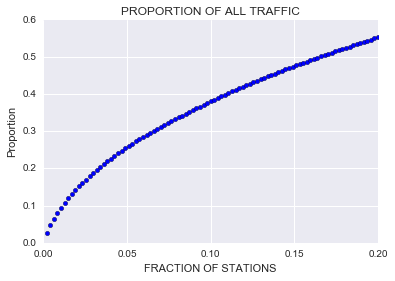

In [87]:
frame = plt.gca()

plt.scatter(to_470, cumulative['total_cumulative'])
plt.ylabel('Proportion')
plt.xlabel('FRACTION OF STATIONS')
plt.title('PROPORTION OF ALL TRAFFIC')
plt.ylim((0,0.6))
plt.xlim((0, 0.2))

plt.savefig('cumulative_prob_dist_scatter_zoomed.png', dpi = 300, bbox_inches = 'tight')


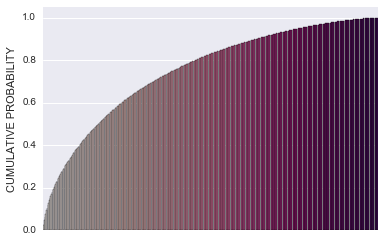

In [63]:
# initial plot - to be refined

frame1 = plt.gca()

seaborn.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative, saturation = 0.75, palette = 'RdPu')


#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
#plt.xticks(rotation=90)
#plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,1.05))

plt.savefig('cumulative_prob_dist.png', dpi = 300, bbox_inches = 'tight')


In [67]:
topstation_name = ['GRD CNTRL-42 ST (4567S)',
 '34 ST-HERALD SQ (BDFMNQR)',
 'TIMES SQ-42 ST (1237ACENQRS)',
 '42 ST-PORT AUTH (ACENQRS1237)',
 '34 ST-PENN STA (ACE)',
 '14 ST-UNION SQ (LNQR456)',
 '86 ST (456)',
 '47-50 STS ROCK (BDFM)',
 'FLUSHING-MAIN (7)',
 '59 ST COLUMBUS (ABCD1)']

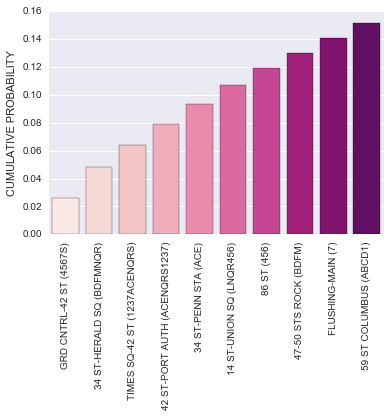

In [76]:
# initial plot - to be refined

#frame2 =plt.gca()
#plt.tight_layout()

fig2 = plt.figure(dpi = 300)
ax1  = fig2.add_subplot(111)

seaborn.barplot(x = 'STATIONLINE', y = 'total_cumulative', data = cumulative.head(10), saturation = 0.75, palette = 'RdPu')

ax1.set_xlabel('CUMULATIVE PROBABILITY')
ax1.set_xticklabels(topstation_name)
#x = cumulative['STATION']
#y = cumulative['total_cumulative']
#plt.plot(y[:10])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('CUMULATIVE PROBABILITY')
#ax2.set_yticklabels(topstation_name[::-1])
ax1.set_xticklabels(topstation_name)

#plt.title('CUMULATIVE PROBABILITY DISTRIBUTION')
frame1.axes.get_xaxis().set_visible(False)
plt.ylim((0,0.16))


#plt.savefig('cumul_prob_dist_top10_v2.png', dpi = 300)
fig2.savefig('cumul_prob_dist_top10.png', dpi =300, bbox_inches = 'tight')


# HERE!

In [ ]:
topten = summary.sort_values(by = ['total_traffic'], ascending = False).head(10)

In [ ]:
toptwenty = summary.sort_values(by = ['total_traffic'], ascending = False).head(20)

In [ ]:
list(topten['STATIONLINE'])

In [ ]:
topstation_name = ['GRD CNTRL-42 ST 4567S',
 '34 ST-HERALD SQ BDFMNQR',
 'TIMES SQ-42 ST 1237ACENQRS',
 '42 ST-PORT AUTH ACENQRS1237',
 '34 ST-PENN STA ACE',
 '14 ST-UNION SQ LNQR456',
 '86 ST 456',
 '47-50 STS ROCK BDFM',
 'FLUSHING-MAIN 7',
 '59 ST COLUMBUS ABCD1']


In [ ]:
topstation = list(topten['STATIONLINE'])

In [ ]:
daily_total
fig1 = plt.figure(dpi = 600, figsize = (15, 10))
ax1  = fig1.add_subplot(111)
clr = numpy.arange(0, 1.1, 0.1)

for i in topstation:
    station_total = daily_total[daily_total['STATIONLINE']==i]
    x = numpy.array(station_total['dayofweek'])
    y = numpy.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c, linewidth = 2.0)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_yticklabels(numpy.arange(0.0, 1.6, 0.2))
ax1.set_ylabel('Turnstile Count (Million)')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [ ]:
t_en = numpy.array(topten['total_entry'])[::-1]
t = numpy.array(topten['total_traffic'])[::-1]

In [ ]:
fig2 = plt.figure(dpi = 400, figsize = (12, 8))
ax2  = fig2.add_subplot(111)
ax2.barh(range(0, 10), t, color = '#C24890', label = 'exits', align = 'center', edgecolor = "none")
ax2.barh(range(0, 10), t_en, color = '#5F1564', label = 'entries', align = 'center', edgecolor = "none")
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation_name[::-1])
ax2.set_xlabel('Turnstile Counts (Million)')
ax2.set_xticklabels(range(0,8))
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');
fig2.savefig('Fig1.png')

In [ ]:
weekday_data = turnstile_df[turnstile_df['dayofweek']<5]

In [ ]:
weekday_data['st2']=weekday_data['STATIONLINE']

In [ ]:
weekday_data_to = weekday_data[weekday_data['st2'].isin(topstation)]

In [ ]:
m1 = weekday_data_to['STATIONLINE']
m2 = weekday_data_to['TIME']
m3 = weekday_data_to['net_sum']

In [ ]:
m_new = pd.concat([m1, m2, m3], axis=1)

In [ ]:
hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0:
        hslot.append(6)
    elif hour > 0 and hour <= 4:
        hslot.append(1)
    elif hour <=8:
        hslot.append(2)
    elif hour <=12:
        hslot.append(3)
    elif hour <=16:
        hslot.append(4)
    elif hour<=20:
        hslot.append(5)
    else:
        hslot.append(6)


In [ ]:
m_new['hslot'] = hslot

In [ ]:
stationbyhour = m_new.groupby(['STATIONLINE', 'hslot'])['net_sum'].sum()

In [ ]:
stationbyhour= stationbyhour.reset_index()

In [ ]:
stationbyhour

In [ ]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATIONLINE']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = topstation_name[index], color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));